<a href="https://colab.research.google.com/github/SarmSKunatham/Oil_Palm_Leaves_Classification/blob/main/Oil_Palm_Leaves_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip /content/drive/MyDrive/Oil-palm-leaves.zip -d /content/drive/MyDrive/OilPalmLeavesDataset

In [1]:
dataset = "/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2"

# Import

In [2]:
import os
import glob
import numpy as np
import tensorflow as tf
import cv2
import pandas
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose, SeparableConv2D
from keras.models import Sequential
from keras.layers import BatchNormalization

# Creat a Dataset

In [7]:
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# For Potassium (K)

In [31]:
training_set_K = train_datagen.flow_from_directory('/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2/K/train',
                                                 target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = BATCH_SIZE,
                                                 shuffle=True,
                                                 class_mode = 'categorical',)
testing_set_K = test_datagen.flow_from_directory('/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2/K/test',
                                                 target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = BATCH_SIZE,
                                                 shuffle=True,
                                                 class_mode = 'categorical')

Found 615 images belonging to 3 classes.
Found 67 images belonging to 3 classes.


In [19]:
# Deficiency
class_0 = glob.glob(os.path.join('/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2/K/train/deficiency','*'))
# Excess
class_1 = glob.glob(os.path.join('/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2/K/train/excess','*'))
# Normal
class_2 = glob.glob(os.path.join('/content/drive/MyDrive/OilPalmLeavesDataset/oil_palm_rangesV2/K/train/normal','*'))

In [21]:
# Number of each class
print(len(class_0))
print(len(class_1))
print(len(class_2))

219
113
283


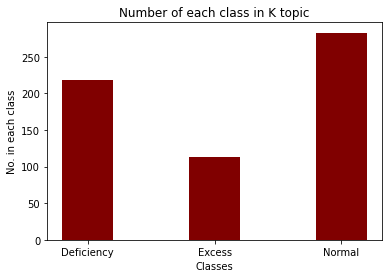

In [25]:
# creating the bar plot
plt.bar(['Deficiency','Excess', 'Normal'], [len(class_0), len(class_1), len(class_2)] , color ='maroon',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("No. in each class")
plt.title("Number of each class in K topic")
plt.show()

Class Imbalance

In [17]:
# Labels for B classes
labels = {0: 'deficiency',
          1: 'excess',
          2: 'normal'
          }

(64, 224, 224, 3)


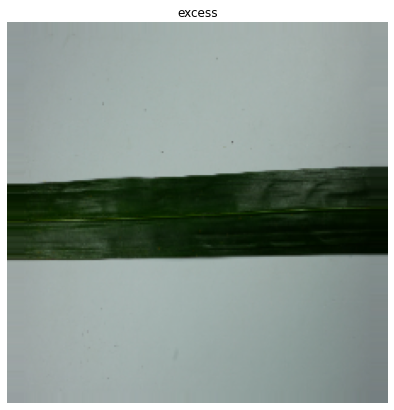

(64, 224, 224, 3)


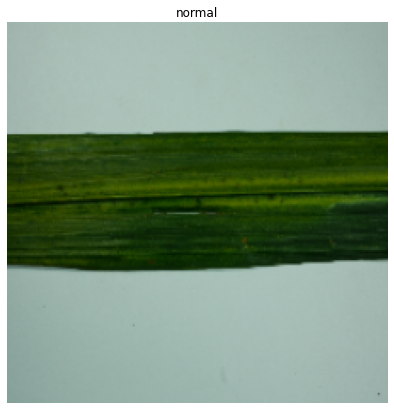

(64, 224, 224, 3)


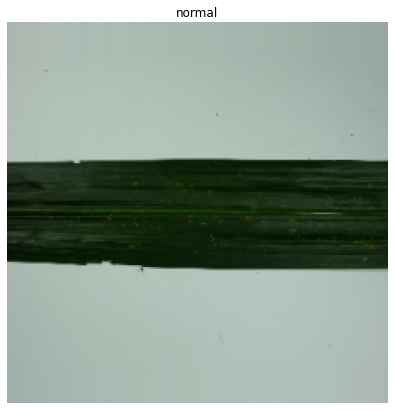

(64, 224, 224, 3)


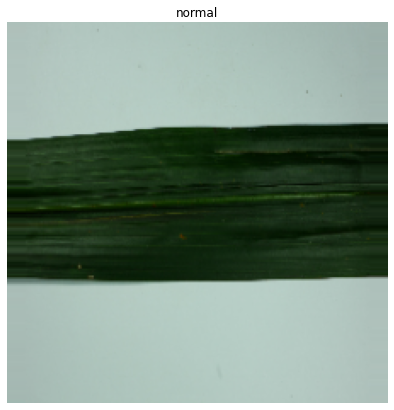

(64, 224, 224, 3)


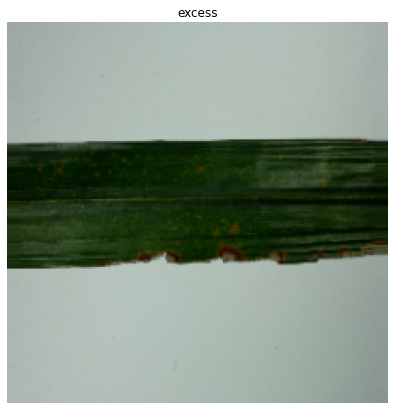

(64, 224, 224, 3)


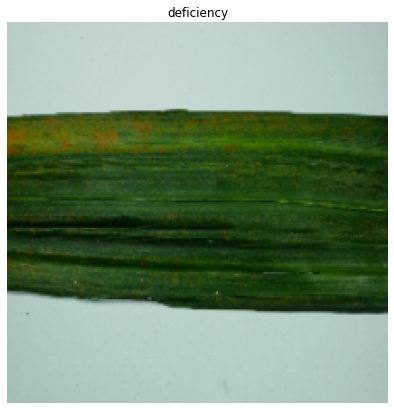

(64, 224, 224, 3)


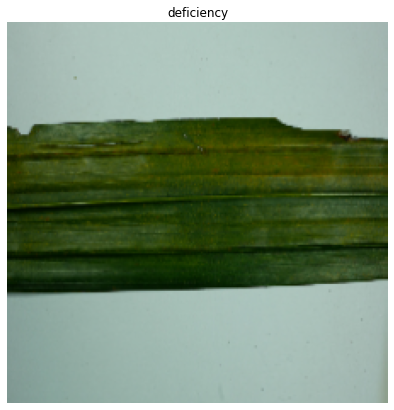

(64, 224, 224, 3)


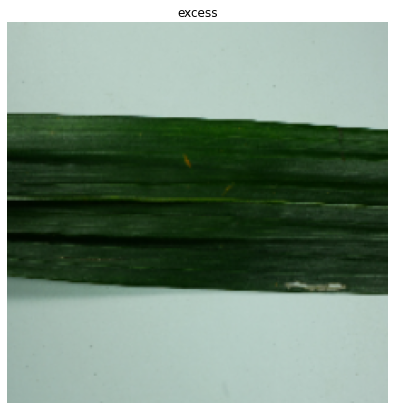

(64, 224, 224, 3)


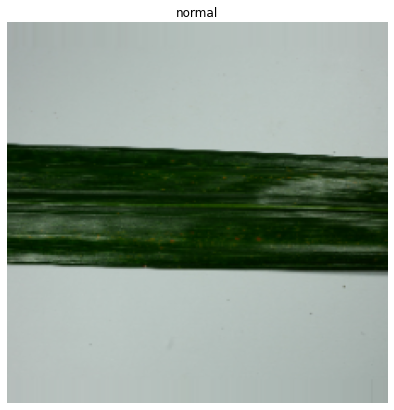

(39, 224, 224, 3)


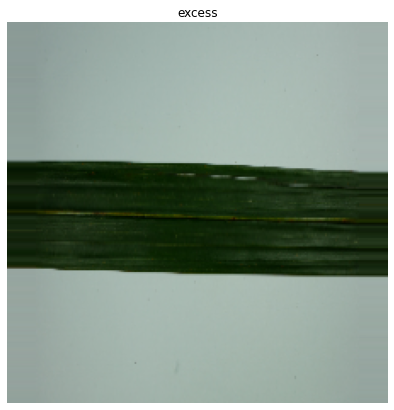

(64, 224, 224, 3)


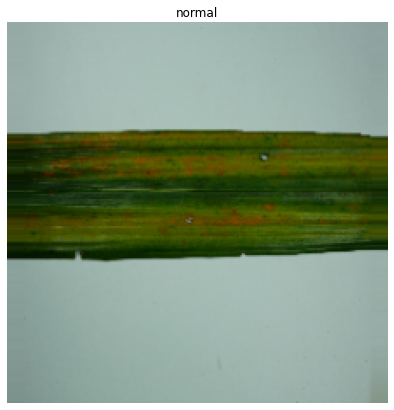

(64, 224, 224, 3)


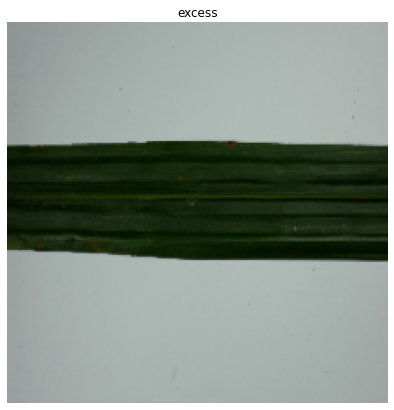

In [32]:
# Visualize example of images
for _ in range(12):
    plt.figure(figsize = (7, 7))
    img, label = training_set_K.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.title(labels[np.argmax(label[0])])
    plt.axis("off")
    plt.show()

# Create Model (Resnet 50)

In [33]:
# Create model
def create_model(trainable = False):
  model=Sequential()
  model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=(105,105,3)))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.layers[0].trainable = trainable # cuztomizable layer

  return model

In [34]:
# model setup
model = create_model(True)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 24,121,219
Trainable params: 24,064,003
Non-trainable params: 57,216
_____________________________________

In [36]:
early_stopping= EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=15, verbose=0, mode='auto')

# filepath="/content/Drive/MyDrive/SouthernPalm/B-Freeze"

# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

callbacks_list = [early_stopping]

In [37]:
import time
start_time = time.time()
history = model.fit(training_set_K,
          validation_data = testing_set_K,
          epochs=200,
          verbose=1,
          shuffle=True,
          callbacks=callbacks_list)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
10/10 [==============================] - 36s 3s/step - loss: 1.7664 - accuracy: 0.4309 - val_loss: 2.2038 - val_accuracy: 0.4627
Epoch 2/200
10/10 [==============================] - 11s 1s/step - loss: 1.3485 - accuracy: 0.5431 - val_loss: 52.4135 - val_accuracy: 0.4627
Epoch 3/200
10/10 [==============================] - 11s 1s/step - loss: 1.1125 - accuracy: 0.5577 - val_loss: 397.9969 - val_accuracy: 0.3582
Epoch 4/200
10/10 [==============================] - 10s 1s/step - loss: 0.9290 - accuracy: 0.6260 - val_loss: 71.2360 - val_accuracy: 0.4627
Epoch 5/200
10/10 [==============================] - 11s 1s/step - loss: 0.9875 - accuracy: 0.6341 - val_loss: 626.9111 - val_accuracy: 0.4627
Epoch 6/200
10/10 [==============================] - 11s 1s/step - loss: 0.8893 - accuracy: 0.6358 - val_loss: 395.5441 - val_accuracy: 0.4627
Epoch 7/200
10/10 [==============================] - 11s 1s/step - loss: 0.8962 - accuracy: 0.6309 - val_loss: 14.6048 - val_accuracy: 0.4627
Epoc

In [38]:
# CNN layers model
def create_CNN_model():
  model = Sequential()
  # Step 1 - Convolution
  model.add(SeparableConv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))

  # Step 2 - Pooling
  model.add(MaxPooling2D(pool_size = (2, 2)))

  # Adding a second convolutional layer
  model.add(SeparableConv2D(64, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(SeparableConv2D(96, (3, 3), activation = 'relu'))

  # Step 3 - Flattening
  model.add(Flatten())

  # Step 4 - Full connection
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dense(units = 128, activation = 'relu'))
  model.add(Dense(units = 3, activation = 'softmax'))

  return model

In [39]:
CNN_model = create_CNN_model()
# Compiling the CNN
CNN_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 222, 222, 32)     155       
 Conv2D)                                                         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 separable_conv2d_1 (Separab  (None, 109, 109, 64)     2400      
 leConv2D)                                                       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 separable_conv2d_2 (Separab  (None, 52, 52, 96)      

In [41]:
early_stopping= EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, verbose=0, mode='auto')

# filepath="/content/Drive/MyDrive/SouthernPalm/B-Freeze"

# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

callbacks_list = [early_stopping]

In [42]:
import time
start_time = time.time()
history = CNN_model.fit(training_set_K,
          validation_data = testing_set_K,
          epochs=200,
          shuffle=True,
          callbacks = callbacks_list)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/200
10/10 [==============================] - 10s 896ms/step - loss: 1.0514 - accuracy: 0.4358 - val_loss: 1.0379 - val_accuracy: 0.4627
Epoch 2/200
10/10 [==============================] - 9s 936ms/step - loss: 1.0422 - accuracy: 0.4650 - val_loss: 1.0553 - val_accuracy: 0.4925
Epoch 3/200
10/10 [==============================] - 9s 885ms/step - loss: 1.0373 - accuracy: 0.4732 - val_loss: 1.0417 - val_accuracy: 0.4776
Epoch 4/200
10/10 [==============================] - 9s 897ms/step - loss: 1.0359 - accuracy: 0.5057 - val_loss: 1.0169 - val_accuracy: 0.5075
Epoch 5/200
10/10 [==============================] - 9s 892ms/step - loss: 1.0226 - accuracy: 0.5220 - val_loss: 1.0198 - val_accuracy: 0.5224
Epoch 6/200
10/10 [==============================] - 9s 910ms/step - loss: 1.0085 - accuracy: 0.4959 - val_loss: 1.0258 - val_accuracy: 0.4179
Epoch 7/200
10/10 [==============================] - 9s 878ms/step - loss: 1.0113 - accuracy: 0.4911 - val_loss: 1.0165 - val_accuracy: 0.582

In [43]:
# Save model
filepath="/content/Drive/MyDrive/SouthernPalm"
CNN_model.save(os.path.join(filepath, 'K-CNN'))

INFO:tensorflow:Assets written to: /content/Drive/MyDrive/SouthernPalm/K-CNN/assets


In [44]:
res = CNN_model.evaluate(testing_set_K)

2/2 [==============================] - 0s 10ms/step - loss: 0.9509 - accuracy: 0.5672


In [45]:
print(f'Training accuracy: {res[0]}')
print(f'Validation accuracy: {res[1]}')

Training accuracy: 0.9508721828460693
Validation accuracy: 0.5671641826629639
